<a href="https://colab.research.google.com/github/saurabhvmac/KaggleProjects/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the modules required


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importing the train and test set

In [6]:
train  = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample_sub = pd.read_csv("/content/sample_submission (1).csv")

In [5]:
print(train.shape)
train = train.dropna()

(42000, 785)


In [6]:
#checking for null values 
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = train.drop('label', axis=1)
y = train.label

# Pie chart for Visualization

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


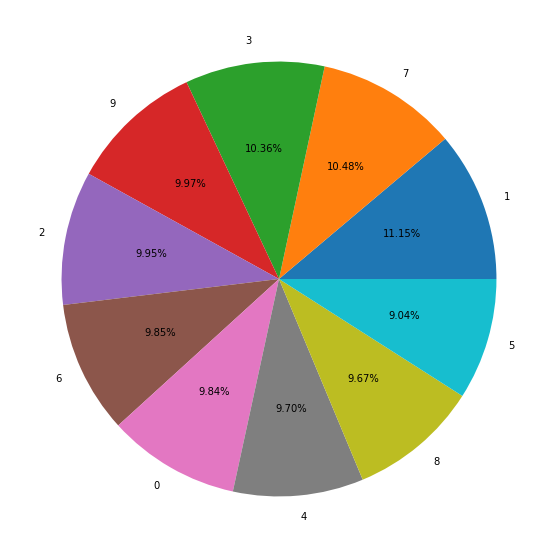

In [8]:
def create_pie(data, label, figsiz=(10,10)):
  print(data[label].value_counts())
  plt.figure(figsize=figsiz)
  plt.pie(data[label].value_counts().values, labels= data[label].value_counts().index, autopct= '%1.2f%%', textprops ={'fontsize':10})
  plt.show()


create_pie(train, 'label')

# sample image

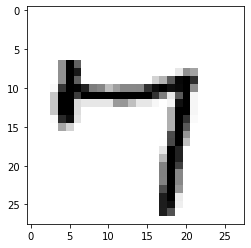

7


In [9]:
sample_image = X.iloc[120]
sample_image_resized = np.array(sample_image).reshape(28,28)
plt.imshow(sample_image_resized, cmap='binary')
plt.show()

print(y.iloc[120])

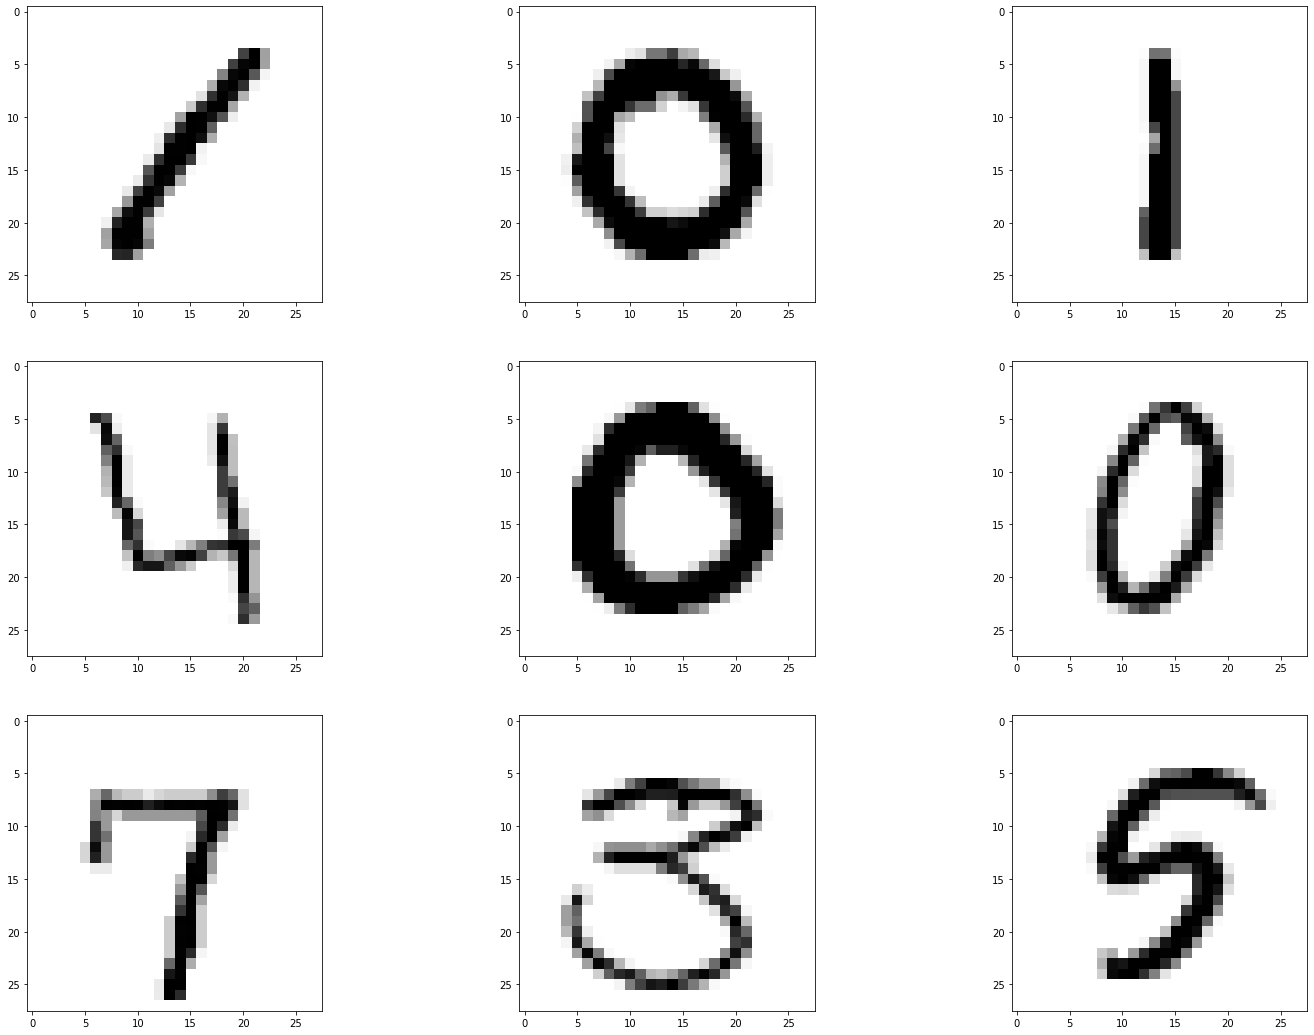

In [10]:
plt.figure(figsize=(25,25))
columns = 3
first_image = train.iloc[:10]

for i in range(0,9):
  image = np.array(X.iloc[i]).reshape(28,28)
  plt.subplot(int(first_image.shape[0]/columns + 1), columns, i + 1)
  plt.imshow(image, cmap='binary')

# The Preprocessing

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state = 42)


In [12]:
sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [13]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


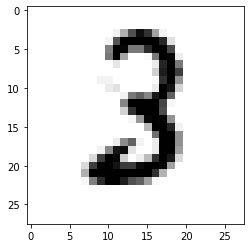

In [14]:
sample_image_test = np.array(test.iloc[4]).reshape(28,28)
plt.imshow(sample_image_test, cmap="binary")

# Predictions and Accuracy count


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_clf = SVC(gamma=0.1, coef0=1, kernel='poly',degree=2)
svm_clf.fit(X_train, y_train)

y_train_pred = svm_clf.predict(X_train)
print("Train Accuracy",accuracy_score(y_train, y_train_pred))

Train Accuracy 1.0


In [16]:
#accuracy score on Validation Set
from sklearn.metrics import classification_report
y_val_predict = svm_clf.predict(X_val)
print(svm_clf.__class__.__name__, accuracy_score(y_val, y_val_predict))
print(svm_clf.__class__.__name__, classification_report(y_val, y_val_predict))

SVC 0.9742857142857143
SVC               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1200
           1       0.98      0.99      0.98      1389
           2       0.97      0.97      0.97      1294
           3       0.97      0.96      0.97      1355
           4       0.97      0.97      0.97      1222
           5       0.97      0.96      0.96      1085
           6       0.98      0.98      0.98      1256
           7       0.98      0.98      0.98      1359
           8       0.97      0.97      0.97      1209
           9       0.97      0.96      0.96      1231

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [ ]:
#paramater grid for svc
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['linear','poly'],
              'degree':[1,2,],
              'gamma':[0.01,0.1],
              'coef0':[0.5,1]
              }
grid_search = GridSearchCV(SVC(), param_grid, cv=3, return_train_score = True)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model

In [ ]:
y_pred_grid = model.predict(X_val)
accuracy_score(y_val, y_pred_grid)

### Using Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500, oob_score=True, max_samples=1.0, bootstrap = True, n_jobs=-1 )
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_val)
print("Accuracy score for test= ", accuracy_score(y_val, y_pred))
print("oob score", rnd_clf.oob_score_)

Accuracy score for test=  0.9638888888888889
oob score 0.9633673469387755


# final Prediction using SVM_clf

In [ ]:
test_sub = test.copy()
test_prediction = svm_clf.predict(test_sub)

In [ ]:
import pandas as pd
test_predict = pd.Series(test_prediction, name='Label')
image_id = [i+1 for i, value in enumerate(test_predict)]
image_id = pd.Series(image_id, name='ImageId')

submission = pd.concat([image_id, test_predict], axis=1)
submission.to_csv('submission.csv', index=False)